Titanic Dataset Analysis for Data Analytics Bootcamp (Montgomery College, Fall 2017)
This Jupyter Notebook 2.7 file is created by Antonina Redko

Assignment: Explore if certain characteristics of Titanic passengers described by variables available in the dataset influence passengers’ chances to survive.

Source of the data: Kaggle.com. The bootcamp instructor downloaded the dataset “titanic3.xls” in Canvas.instructure.com

Titanic Dataset Description Variables: Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) survival - Survival (0 = No; 1 = Yes) name - Name sex - Sex age - Age sibsp - Number of Siblings/Spouses Aboard parch - Number of Parents/Children Aboard ticket - Ticket Number fare - Passenger Fare (British pound) cabin - Cabin embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) boat - Lifeboat body - Body Identification Number home.dest - Home/Destination

Codes and ideas are taken from: 
1) Data Analysis with Python by Alton Henley, Dave Wolf - http://courses.learningbycoding.com/courses/enrolled/138540 
2) A Github user (jasonicarter) - https://github.com/jasonicarter/DAND_Titanic_Data_Analysis/blob/master/TitanicData.ipynb

In [1]:
# Inline plot
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the dataset, create dataframe
Location = "titanic3.xls"
titanic_all = pd.read_excel(Location)

# Print the first few records to review data and format
titanic_all.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
#Check how many passangers survived out of 1309
survived_all = titanic_all[titanic_all['survived']==1]
survived_all.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,500.000000,500.0,427.000000,500.000000,500.000000,500.000000,0.0
mean,1.962000,1.0,28.918228,0.462000,0.476000,49.361184,NaN
std,0.872972,0.0,15.061481,0.685197,0.776292,68.648795,NaN
min,1.000000,1.0,0.166700,0.000000,0.000000,0.000000,NaN
25%,1.000000,1.0,20.000000,0.000000,0.000000,11.214600,NaN
50%,2.000000,1.0,28.000000,0.000000,0.000000,26.000000,NaN
75%,3.000000,1.0,38.000000,1.000000,1.000000,57.750000,NaN
max,3.000000,1.0,80.000000,4.000000,5.000000,512.329200,NaN


In [3]:
#Adapted from jasonicarter Titanic analysis

# Returns survival rate/percentage of sex and class for a dataset with all observations
def survival_rate(pclass, sex):
    grouped_by_total = titanic_all.groupby(['pclass', 'sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_all.groupby(['pclass','survived','sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

In [4]:
# Get the actual numbers grouped by class, survival and sex
groupedby_class_survived_size = titanic_all.groupby(['pclass','survived','sex']).size()

# Print - Grouped by class, survival and sex
print groupedby_class_survived_size
print 'Class 1 - female survival rate, all observations: {}%'.format(survival_rate(1,'female'))
print 'Class 1 - male survival rate, all observations: {}%'.format(survival_rate(1,'male'))
print '-----'
print 'Class 2 - female survival rate, all observations: {}%'.format(survival_rate(2,'female'))
print 'Class 2 - male survival rate, all observations: {}%'.format(survival_rate(2,'male'))
print '-----'
print 'Class 3 - female survival rate, all observations: {}%'.format(survival_rate(3,'female'))
print 'Class 3 - male survival rate, all observations: {}%'.format(survival_rate(3,'male'))

pclass  survived  sex   
1       0         female      5
                  male      118
        1         female    139
                  male       61
2       0         female     12
                  male      146
        1         female     94
                  male       25
3       0         female    110
                  male      418
        1         female    106
                  male       75
dtype: int64
Class 1 - female survival rate, all observations: 96.53%
Class 1 - male survival rate, all observations: 34.08%
-----
Class 2 - female survival rate, all observations: 88.68%
Class 2 - male survival rate, all observations: 14.62%
-----
Class 3 - female survival rate, all observations: 49.07%
Class 3 - male survival rate, all observations: 15.21%


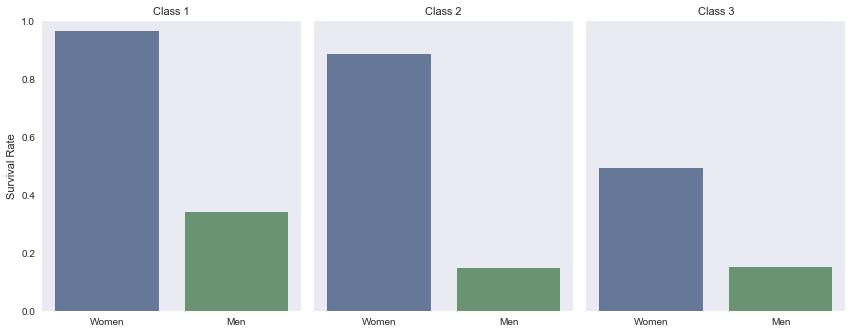

In [5]:
# Set style for all graphs
sns.set_style("dark")

# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="sex", y="survived", col="pclass", data=titanic_all, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Women", "Men"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

In [6]:
# Return survival rate/percentage of class for a dataset with all observations
def survival_rate(pclass):
    grouped_by_total = titanic_all.groupby(['pclass']).size()[pclass].astype('float')
    grouped_by_survived_pclass = \
        titanic_all.groupby(['pclass','survived']).size()[pclass,1].astype('float')
    survived_pclass_pct = (grouped_by_survived_pclass / grouped_by_total * 100).round(2)
    
    return survived_pclass_pct

In [7]:
# Get the actual numbers grouped by passenger class and survival 
groupedby_class_survived_size = titanic_all.groupby(['pclass','survived']).size()

# Print - Grouped by class and survival
print groupedby_class_survived_size
print 'Class 1 - survival rate, all observations: {}%'.format(survival_rate(1))
print '-----'
print 'Class 2 - survival rate, all observations: {}%'.format(survival_rate(2))
print '-----'
print 'Class 3 - survival rate, all observations: {}%'.format(survival_rate(3))

pclass  survived
1       0           123
        1           200
2       0           158
        1           119
3       0           528
        1           181
dtype: int64
Class 1 - survival rate, all observations: 61.92%
-----
Class 2 - survival rate, all observations: 42.96%
-----
Class 3 - survival rate, all observations: 25.53%


In [8]:
# Return survival rate/percentage of gender for a dataset with all observations
def survival_rate(sex):
    grouped_by_total = titanic_all.groupby(['sex']).size()[sex].astype('float')
    grouped_by_survived_sex = \
        titanic_all.groupby(['sex','survived']).size()[sex,1].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

In [9]:
# Get the actual numbers grouped by gender and survival 
groupedby_gender_survived_size = titanic_all.groupby(['sex','survived']).size()

# Print - Grouped by gender and survival
print groupedby_gender_survived_size
print 'Male - survival rate, all observations: {}%'.format(survival_rate('male'))
print '-----'
print 'Female - survival rate, all observations: {}%'.format(survival_rate('female'))

sex     survived
female  0           127
        1           339
male    0           682
        1           161
dtype: int64
Male - survival rate, all observations: 19.1%
-----
Female - survival rate, all observations: 72.75%


In [11]:
# Calculate number of missing values
titanic_all.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [13]:
# Create a new dataset without variables that won't be used for analysis at this point
# axis=1 tells us to drop a column(1) and not a row(0)
titanic_shorter = titanic_all.drop(['ticket','cabin','fare','boat', 'body', 'home.dest'], axis=1)
titanic_shorter.head()

,pclass,survived,name,sex,age,sibsp,parch,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,S


In [14]:
#Drop rows with missing data
titanic = titanic_shorter.dropna()
titanic.count()

pclass      1044
survived    1044
name        1044
sex         1044
age         1044
sibsp       1044
parch       1044
embarked    1044
dtype: int64

In [15]:
# Create a new variable with age categories
bins = [0, 5, 10, 15, 18, 25, 30, 40, 50, 60, 70, 80]
group_names = ['under 5', '5-10', '11-15', '16-18','19-25','26-30', '31-40', '41-50', '51-60','61-70','71-90']

In [16]:
titanic['agerange']=pd.cut(titanic['age'], bins, labels=group_names)
titanic.head()

C:\Users\Antonina\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pclass,survived,name,sex,age,sibsp,parch,embarked,agerange
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,S,26-30
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,S,under 5
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,S,under 5
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,S,26-30
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,S,19-25


In [17]:
titanic['agerange'].value_counts()

19-25      250
31-40      209
26-30      166
41-50      132
16-18       78
51-60       62
under 5     56
5-10        30
11-15       29
61-70       26
71-90        6
Name: agerange, dtype: int64

In [18]:
# Return survival rate/percentage by age group
def survival_rate(agerange):
    grouped_by_total = titanic.groupby(['agerange']).size()[agerange].astype('float')
    grouped_by_survived_agerange = \
        titanic.groupby(['agerange','survived']).size()[agerange,1].astype('float')
    survived_agerange_pct = (grouped_by_survived_agerange / grouped_by_total * 100).round(2)
    
    return survived_agerange_pct

In [19]:
# Get the actual numbers grouped by passenger age range and survival 
groupedby_agerange_survived_size = titanic.groupby(['agerange','survived']).size()

# Print - Grouped by class and survival
print groupedby_agerange_survived_size
print '-----'
print 'Under 5 survival rate: {}%'.format(survival_rate('under 5'))
print '-----'
print '5-10 survival rate: {}%'.format(survival_rate('5-10'))
print '-----'
print '11-15 survival rate: {}%'.format(survival_rate('11-15'))
print '-----'
print '16-18 survival rate: {}%'.format(survival_rate('16-18'))
print '-----'
print '19-25 survival rate: {}%'.format(survival_rate('19-25'))
print '-----'
print '26-30 survival rate: {}%'.format(survival_rate('26-30'))
print '-----'
print '31-40 survival rate: {}%'.format(survival_rate('31-40'))
print '-----'
print '41-50 survival rate: {}%'.format(survival_rate('41-50'))
print '-----'
print '51-60 survival rate: {}%'.format(survival_rate('51-60'))
print '-----'
print '61-70 survival rate: {}%'.format(survival_rate('61-70'))
print '-----'
print '71-90 survival rate: {}%'.format(survival_rate('71-90'))

agerange  survived
11-15     0            13
          1            16
16-18     0            49
          1            29
19-25     0           157
          1            93
26-30     0           106
          1            60
31-40     0           121
          1            88
41-50     0            80
          1            52
5-10      0            17
          1            13
51-60     0            32
          1            30
61-70     0            21
          1             5
71-90     0             4
          1             2
under 5   0            19
          1            37
dtype: int64
-----
Under 5 survival rate: 66.07%
-----
5-10 survival rate: 43.33%
-----
11-15 survival rate: 55.17%
-----
16-18 survival rate: 37.18%
-----
19-25 survival rate: 37.2%
-----
26-30 survival rate: 36.14%
-----
31-40 survival rate: 42.11%
-----
41-50 survival rate: 39.39%
-----
51-60 survival rate: 48.39%
-----
61-70 survival rate: 19.23%
-----
71-90 survival rate: 33.33%


In [20]:
# Get the actual numbers grouped by passenger age range, sex and survival 
groupedby_agerange_sex_survived_size = titanic.groupby(['agerange','sex','survived']).size()
print groupedby_agerange_sex_survived_size

agerange  sex     survived
11-15     female  0             3
                  1            12
          male    0            10
                  1             4
16-18     female  0            10
                  1            26
          male    0            39
                  1             3
19-25     female  0            22
                  1            64
          male    0           135
                  1            29
26-30     female  0            18
                  1            39
          male    0            88
                  1            21
31-40     female  0            14
                  1            60
          male    0           107
                  1            28
41-50     female  0            10
                  1            36
          male    0            70
                  1            16
5-10      female  0             8
                  1             5
          male    0             9
                  1             8
51-60     female  0  

In [21]:
# Return survival rate/percentage by age group
def survival_rate(agerange, sex):
    grouped_by_total = titanic.groupby(['agerange','sex']).size()[agerange, sex].astype('float')
    grouped_by_survived_agerange_sex = \
        titanic.groupby(['agerange','survived','sex']).size()[agerange,1,sex].astype('float')
    survived_agerange_sex_pct = (grouped_by_survived_agerange_sex / grouped_by_total * 100).round(2)
    
    return survived_agerange_sex_pct

In [22]:
print 'Male under 5 survival rate: {}%'.format(survival_rate('under 5','male'))
print '-----'
print 'Female under 5 survival rate: {}%'.format(survival_rate('under 5', 'female'))
print '-----'
print 'Male 5-10 survival rate: {}%'.format(survival_rate('5-10','male'))
print '-----'
print 'Female 5-10 survival rate: {}%'.format(survival_rate('5-10','female'))
print '-----'
print 'Male 11-15 survival rate: {}%'.format(survival_rate('11-15','male'))
print '-----'
print 'Female 11-15 survival rate: {}%'.format(survival_rate('11-15','female'))
print '-----'
print 'Male 16-18 survival rate: {}%'.format(survival_rate('16-18','male'))
print '-----'
print 'Female 16-18 survival rate: {}%'.format(survival_rate('16-18','female'))
print '-----'
print 'Male 19-25 survival rate: {}%'.format(survival_rate('19-25','male'))
print '-----'
print 'Female 19-25 survival rate: {}%'.format(survival_rate('19-25','female'))
print '-----'
print 'Male 26-30 survival rate: {}%'.format(survival_rate('26-30','male'))
print '-----'
print 'Female 26-30 survival rate: {}%'.format(survival_rate('26-30','female'))
print '-----'
print 'Male 31-40 survival rate: {}%'.format(survival_rate('31-40','male'))
print '-----'
print 'Female 31-40 survival rate: {}%'.format(survival_rate('31-40','female'))
print '-----'
print 'Male 41-50 survival rate: {}%'.format(survival_rate('41-50','male'))
print '-----'
print 'Female 41-50 survival rate: {}%'.format(survival_rate('41-50','female'))
print '-----'
print 'Male 51-60 survival rate: {}%'.format(survival_rate('51-60','male'))
print '-----'
print 'Female 51-60 survival rate: {}%'.format(survival_rate('51-60','female'))
print '-----'
print 'Male 61-70 survival rate: {}%'.format(survival_rate('61-70','male'))
print '-----'
print 'Female 61-70 survival rate: {}%'.format(survival_rate('61-70','female'))
print '-----'
print 'Male 71-90 survival rate: {}%'.format(survival_rate('71-90','male'))
print '-----'
print 'Female 71-90 survival rate: {}%'.format(survival_rate('71-90','female'))

Male under 5 survival rate: 60.71%
-----
Female under 5 survival rate: 71.43%
-----
Male 5-10 survival rate: 47.06%
-----
Female 5-10 survival rate: 38.46%
-----
Male 11-15 survival rate: 28.57%
-----
Female 11-15 survival rate: 80.0%
-----
Male 16-18 survival rate: 7.14%
-----
Female 16-18 survival rate: 72.22%
-----
Male 19-25 survival rate: 17.68%
-----
Female 19-25 survival rate: 74.42%
-----
Male 26-30 survival rate: 19.27%
-----
Female 26-30 survival rate: 68.42%
-----
Male 31-40 survival rate: 20.74%
-----
Female 31-40 survival rate: 81.08%
-----
Male 41-50 survival rate: 18.6%
-----
Female 41-50 survival rate: 78.26%
-----
Male 51-60 survival rate: 18.92%
-----
Female 51-60 survival rate: 92.0%
-----
Male 61-70 survival rate: 4.76%
-----
Female 61-70 survival rate: 80.0%
-----
Male 71-90 survival rate: 20.0%
-----
Female 71-90 survival rate: 100.0%


* Passenger class and gender were the main predictors of a passenger’s chances to survive. Age also played a role to a certain degree, with younger passengers, until the age of 5, more likely to survive than older passengers. 

* Survival rate for the First Class passengers was 62%, Second Class – 43% and Third Class – only 26%. 
Class 1 - survival rate, all observations: 61.92%
Class 2 - survival rate, all observations: 42.96%
Class 3 - survival rate, all observations: 25.53%

* 73% of female voyagers survived, while only 19% of male ones did. 
Male - survival rate, all observations: 19.1%
Female - survival rate, all observations: 72.75%

* Among men, the most likely to survive were the First Class occupiers at 34%, while only 15% of men traveling the Second and Third class, respectively, survived. The Third Class female passengers’ were the least lucky among women, with chances to survive close to 50-50, while women in the First and Second Classes had very good chances to get out alive, at 97% and 89% respectively. 
Class 1 - female survival rate, all observations: 96.53%
Class 1 - male survival rate, all observations: 34.08%
Class 2 - female survival rate, all observations: 88.68%
Class 2 - male survival rate, all observations: 14.62%
Class 3 - female survival rate, all observations: 49.07% 
Class 3 - male survival rate, all observations: 15.21%

* Children under five had the best chances of survival among all age categories, at 66%. 
Under 5 survival rate: 66.07%

* The further breakdown by age range and gender shows that in all age categories women are more likely to survive than men, except 5 to 10-years old category, where 38% of girls and 47% of boys survived.